DEEP LEARNING PROJECT

PROBLEM STATEMENT: AI diagnostics in bone oncology for predicting bone metastasis in lung cancer patients

In [36]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3  # Replace EfficientNet import
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [37]:
# Replace EfficientNetB0 with InceptionV3
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(299, 299, 3)  # InceptionV3 requires 299x299 input
)

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

In [38]:
# Modify the final output layer to match the number of classes 
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # Use 'softmax' for multi-class classification

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model for multi-class classification
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define your dataset directory and target directories for split
train_dir = r"C:\Users\DELL 5540\Desktop\AI-Diagnostics-for-Predicting-Bone-Metastasis-in-Lung-Cancer-Patients-main\archive\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset\train"
val_dir = r"C:\Users\DELL 5540\Desktop\AI-Diagnostics-for-Predicting-Bone-Metastasis-in-Lung-Cancer-Patients-main\archive\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset\val"
test_dir = r"C:\Users\DELL 5540\Desktop\AI-Diagnostics-for-Predicting-Bone-Metastasis-in-Lung-Cancer-Patients-main\archive\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset\test"


In [40]:
img_height, img_width = 299, 299
# Created ImageDataGenerators with data augmentation
# Use EfficientNet's built-in preprocessing in generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,  # Add this
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'  # or 'binary', depending on your case
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'  # or 'binary', depending on your case
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',  # or 'binary', depending on your case
    shuffle=False  # Important for evaluation
)

Found 767 images belonging to 3 classes.
Found 164 images belonging to 3 classes.
Found 166 images belonging to 3 classes.


In [41]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(
    train_generator,
    epochs=200,  # Adjust as needed
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
      # Add the callback here
)

C:\Users\DELL 5540\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.4974 - loss: 4.5798 - val_accuracy: 0.7188 - val_loss: 2.3374
Epoch 2/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 1:19 4s/step - accuracy: 0.7188 - loss: 5.6490

C:\Users\DELL 5540\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 455ms/step - accuracy: 0.7188 - loss: 5.6490 - val_accuracy: 0.7125 - val_loss: 2.1457
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.7158 - loss: 2.9492 - val_accuracy: 0.8313 - val_loss: 0.6426
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 456ms/step - accuracy: 0.5312 - loss: 3.8882 - val_accuracy: 0.8562 - val_loss: 0.7118
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.7693 - loss: 1.5528 - val_accuracy: 0.8375 - val_loss: 0.7527
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 462ms/step - accuracy: 0.7500 - loss: 1.0994 - val_accuracy: 0.8438 - val_loss: 0.7770
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.7896 - loss: 1.3179 - val_accuracy: 0.8188 - val_loss: 0.5337
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 468ms/step - accuracy: 0.8125 - loss: 0.9037 - val_accuracy: 0.8188 - val_loss: 0.5830
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.7958 - loss: 0.9765 - val_accuracy: 0.8188 - 

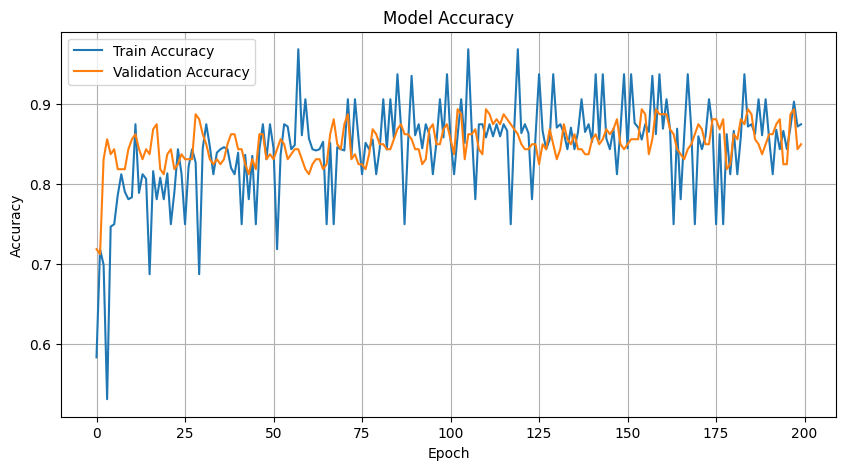

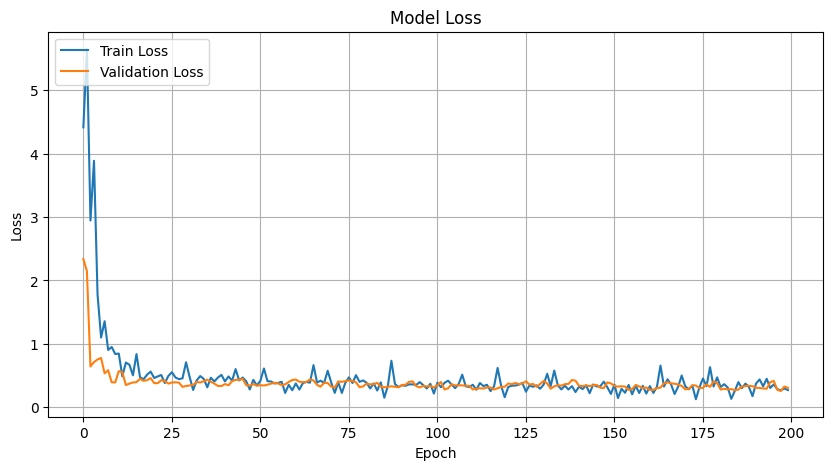

In [42]:
import matplotlib.pyplot as plt

# Plot the accuracy
def plot_accuracy(history):
    plt.figure(figsize=(10, 5))  # Optional: Set figure size for better visualization
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history: # Check if validation accuracy exists
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()  # Optional: Add grid for better readability
    plt.show()

# Plot the loss
def plot_loss(history):
    plt.figure(figsize=(10, 5))  # Optional: Set figure size for better visualization
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:  # Check if validation loss exists
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()  # Optional: Add grid for better readability
    plt.show()

# Call the plot functions
plot_accuracy(history)
plot_loss(history)


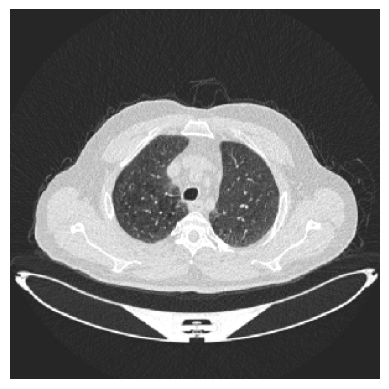

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted class: benign
Prediction confidence: 88.80%


In [48]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt



# Path to the image you want to predict
image_path = r"C:\Users\DELL 5540\Desktop\AI-Diagnostics-for-Predicting-Bone-Metastasis-in-Lung-Cancer-Patients-main\archive\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset\test\Normal cases\Normal case (1).jpg"

# Step 1: Load the image
img = load_img(image_path, target_size=(299, 299))  # Resize to match input shape
plt.imshow(img)  # Display the image
plt.axis('off')  # Hide axis
plt.show()

# Step 2: Preprocess the image
img_array = img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)  # Add this

# Step 3: Make a prediction
predictions = model.predict(img_array)

# Step 4: Interpret the prediction
class_indices = {0: 'normal', 1: 'malignant', 2: 'benign'}  # Update according to your dataset's class indices
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score

# Display the result
print(f"Predicted class: {class_indices[predicted_class[0]]}")
print(f"Prediction confidence: {np.max(predictions) * 100:.2f}%")


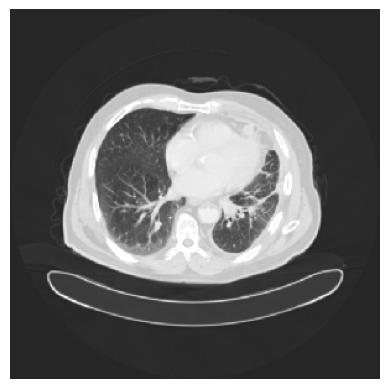

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: malignant
Prediction confidence: 100.00%


In [44]:
image_path = r"C:\Users\DELL 5540\Desktop\AI-Diagnostics-for-Predicting-Bone-Metastasis-in-Lung-Cancer-Patients-main\archive\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset\test\Malignant cases\Malignant case (1).jpg"

# Step 1: Load the image
img = load_img(image_path, target_size=(299, 299))  # Resize to match input shape
plt.imshow(img)  # Display the image
plt.axis('off')  # Hide axis
plt.show()

# Step 2: Preprocess the image
img_array = img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)  # Add this

# Step 3: Make a prediction
predictions = model.predict(img_array)

# Step 4: Interpret the prediction
class_indices = {0: 'normal', 1: 'malignant', 2: 'benign'}  # Update according to your dataset's class indices
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score

# Display the result
print(f"Predicted class: {class_indices[predicted_class[0]]}")
print(f"Prediction confidence: {np.max(predictions) * 100:.2f}%")


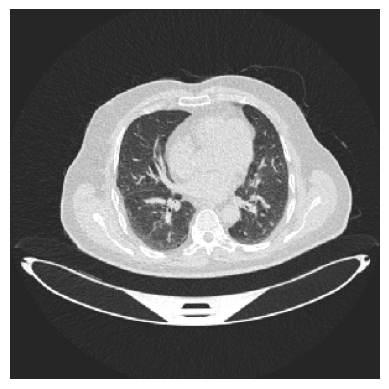

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted class: benign
Prediction confidence: 49.60%


In [47]:
image_path = r"C:\Users\DELL 5540\Desktop\AI-Diagnostics-for-Predicting-Bone-Metastasis-in-Lung-Cancer-Patients-main\archive\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset\test\Benign cases\Bengin case (1).jpg"
# Step 1: Load the image
img = load_img(image_path, target_size=(299, 299))  # Resize to match input shape
plt.imshow(img)  # Display the image
plt.axis('off')  # Hide axis
plt.show()

# Step 2: Preprocess the image
img_array = img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)  # Add this

# Step 3: Make a prediction
predictions = model.predict(img_array)

# Step 4: Interpret the prediction
class_indices = {0: 'normal', 1: 'malignant', 2: 'benign'}  # Update according to your dataset's class indices
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score

# Display the result
print(f"Predicted class: {class_indices[predicted_class[0]]}")
print(f"Prediction confidence: {np.max(predictions) * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step
True labels: 166, Predictions: 166


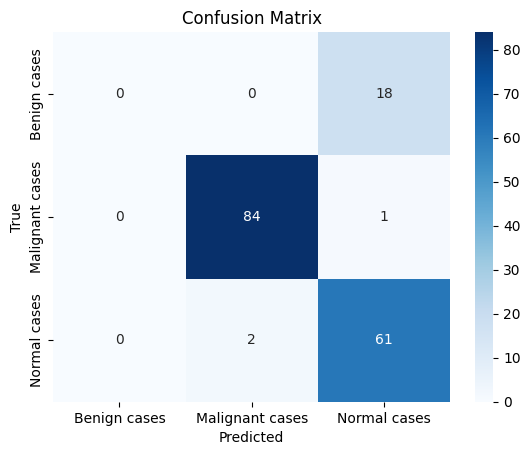

                 precision    recall  f1-score   support

   Benign cases       0.00      0.00      0.00        18
Malignant cases       0.98      0.99      0.98        85
   Normal cases       0.76      0.97      0.85        63

       accuracy                           0.87       166
      macro avg       0.58      0.65      0.61       166
   weighted avg       0.79      0.87      0.83       166



c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set
test_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
test_pred_classes = np.argmax(test_pred, axis=1)

# Get true labels
true_classes = test_generator.classes

# Ensure sizes match
print(f"True labels: {len(true_classes)}, Predictions: {len(test_pred_classes)}")

# Confusion Matrix
cm = confusion_matrix(true_classes, test_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(true_classes, test_pred_classes, target_names=list(test_generator.class_indices.keys())))

